### Lanzhou University
### INFO 213: Data Science Programming II, Fall 2022
---

## Project Proposal

## Project Title: Analysis of factors affecting academic performance

## Student(s): Jishen Hu, Ziyao Yu

#### Date: 2022/11/25
---

#### Abstract
---
*(Briefly summarize the project including the problem, data sets, models, and final findings.)* 

### 1. Introduction
---
*(Introduce the project, describe the objectives, and highlight the key findings.)* 

### 2. Problem Definition
---
*(Define the problem that will be solved in this data analytics project.)*

+ What are the factors that have a greater impact on academic performance?
+ **Develop a classification model** to derive the corresponding score expectations by analyzing the main factors.


### 3. Data Sets
---
*(Describe the origin of the data sources. What is the format of the original data? How to access the data?)*

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load data from a text file
df = pd.read_csv("../data/Portuguese.csv")


### 4. Preparation
---
*(Describe and present any code and methods for cleaning, munging, combining, normalizing, reshaping, slicing and dicing, and transforming data for analysis.)*

In [8]:
# Importing Data
df = df.dropna(axis=0, how='any')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [9]:
# View all attributes in the data
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

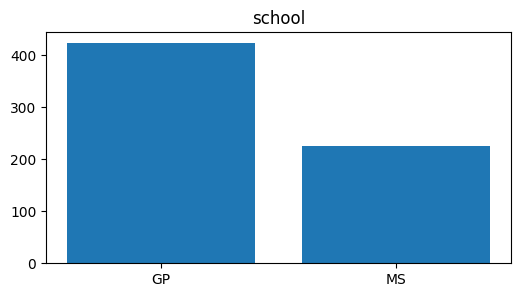

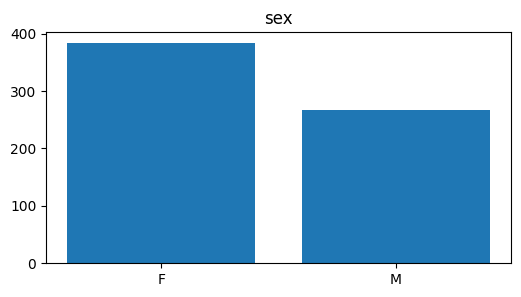

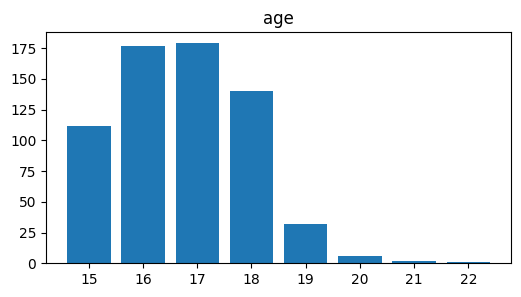

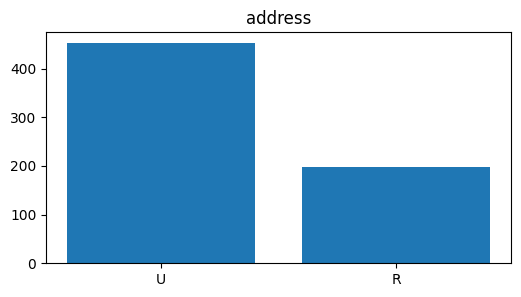

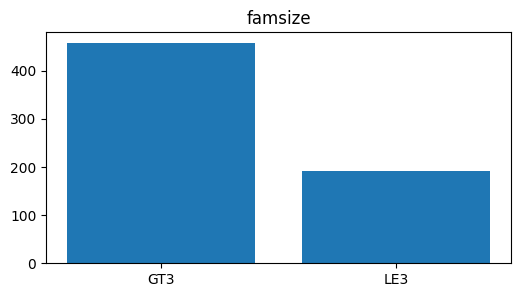

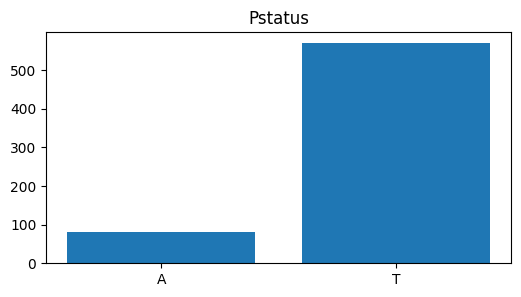

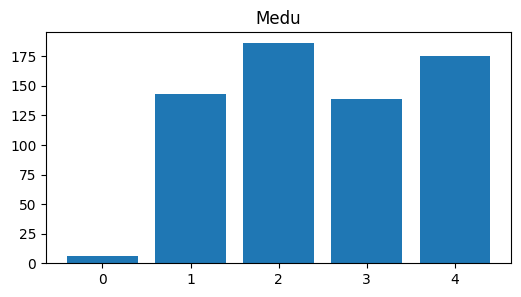

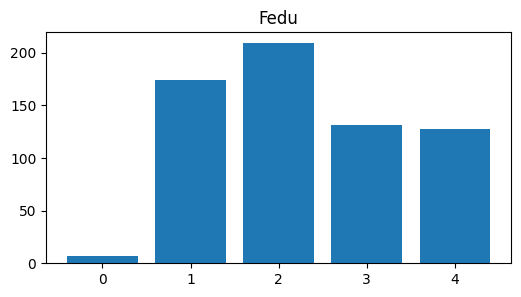

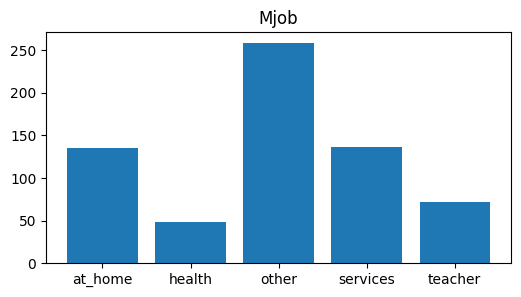

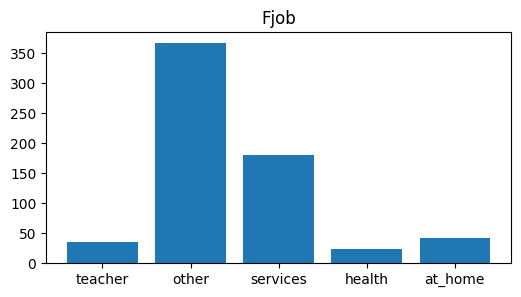

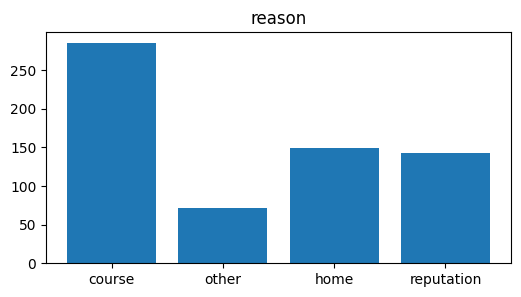

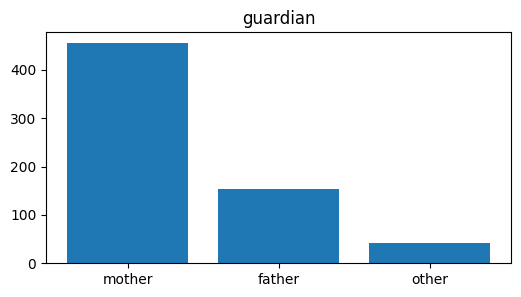

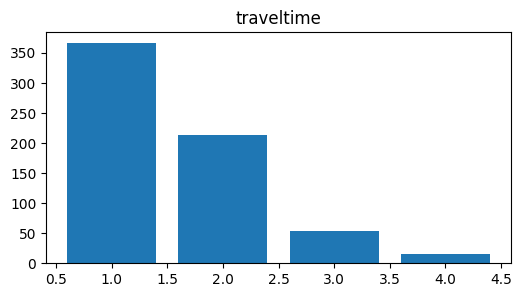

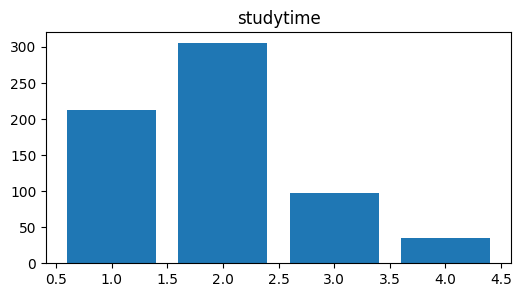

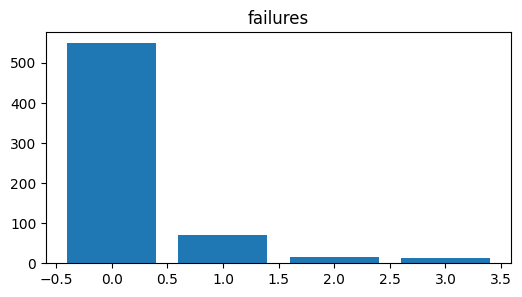

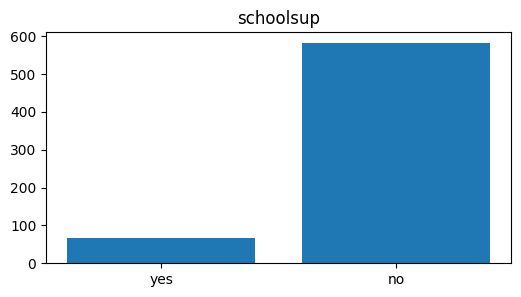

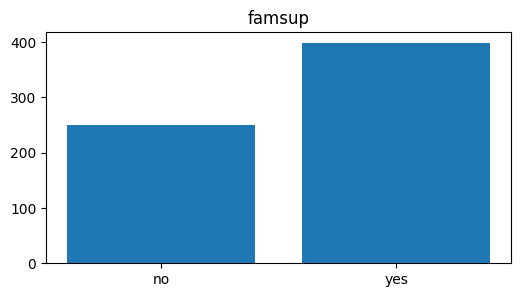

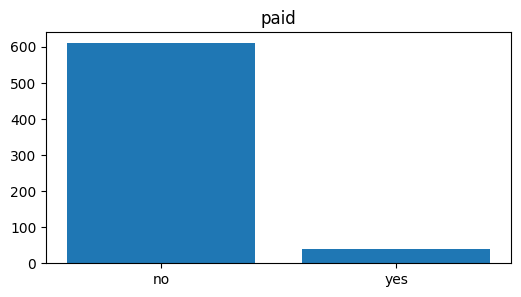

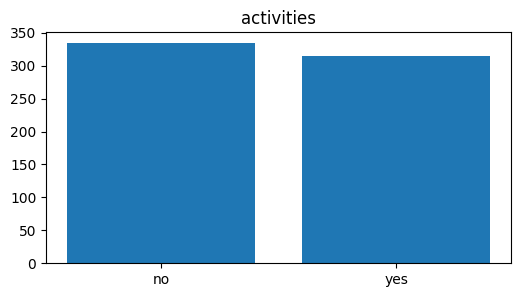

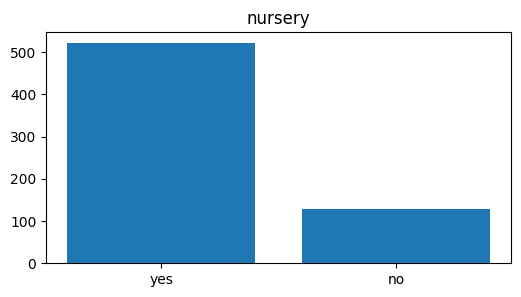

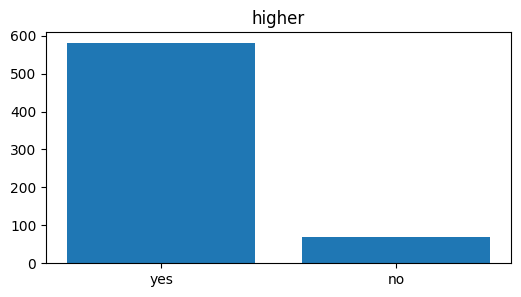

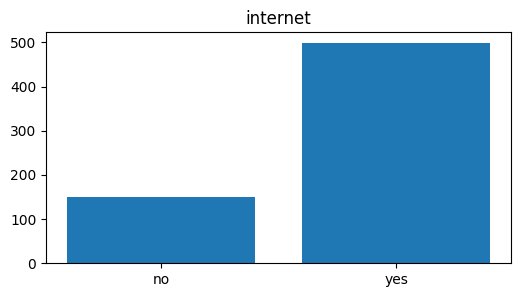

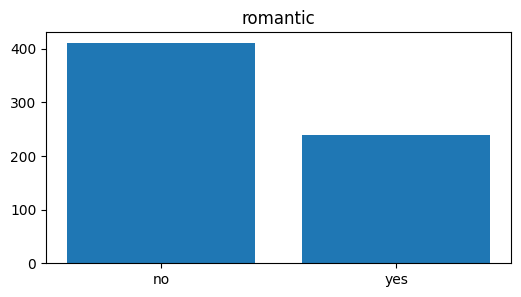

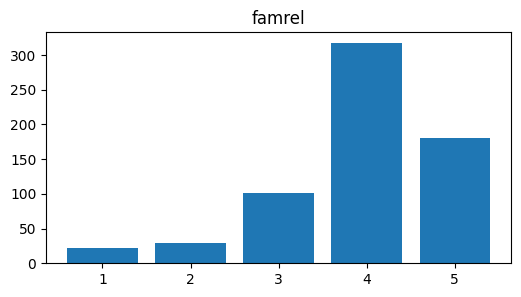

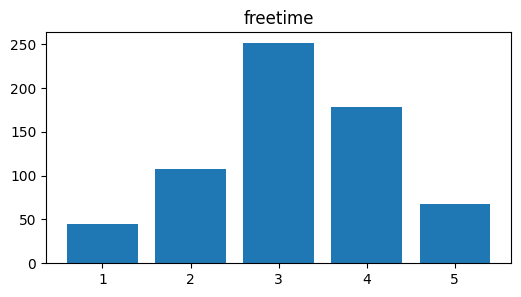

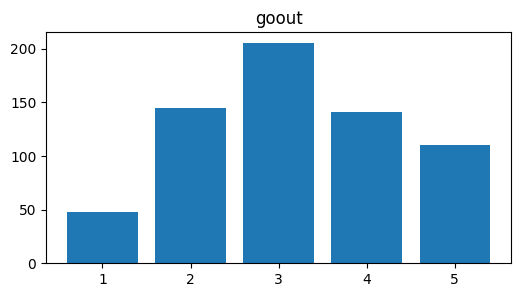

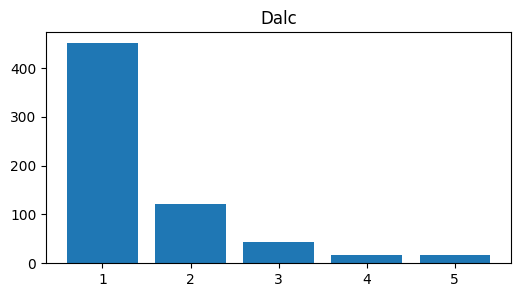

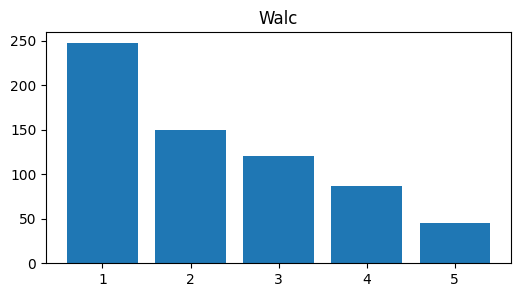

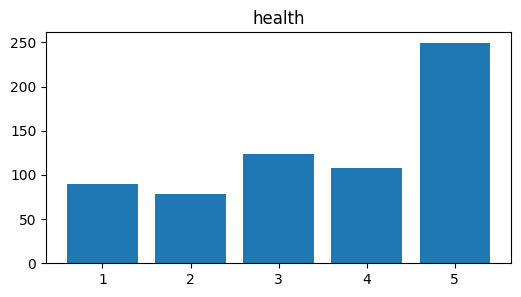

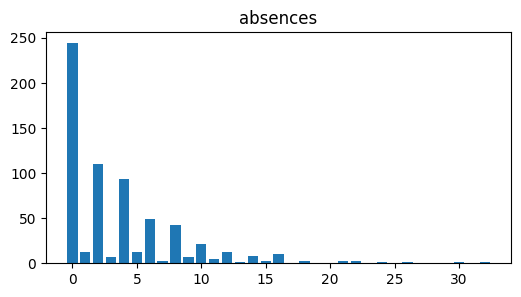

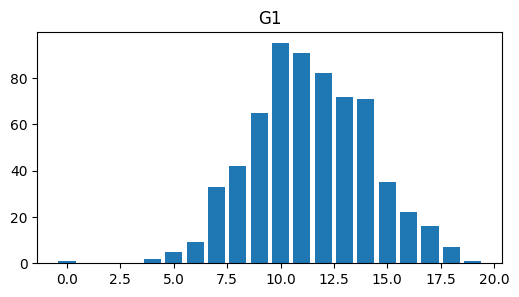

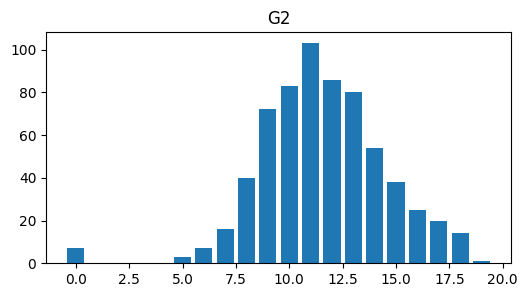

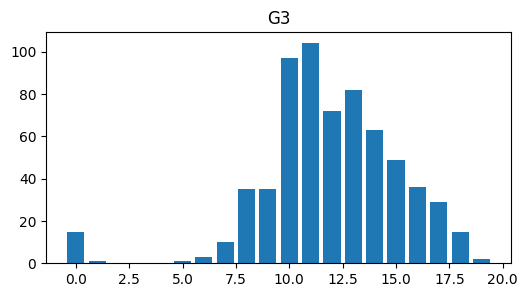

In [18]:
# Define a function that expresses the mathematical distribution of attribute
def draw_bar(column, value, title):
    plt.figure(figsize=(6, 3))
    plt.bar(column, value)
    plt.title(title)
    plt.show()

# The loop operates on each property separately
for column in df.columns: 
    # Put the elements and element distribution of each attribute into column_collection
    column_collection = dict(Counter(df[column]))
    # Put the distribution of elements for each attribute into column_value 
    column_value = [column_collection[name] for name in column_collection]
    # Put the elements of each attribute into column_name
    column_name = [name for name in column_collection]
    draw_bar(column_name, column_value, column)

In [19]:
# Separate non categorical features and target data
df_math = df["G3"]
df_math = df[[
    'age', 'Medu', 
    'Fedu', 'traveltime', 
    'studytime', 'failures', 
    'famrel', 'freetime', 
    'goout', 'Dalc', 
    'Walc', 'health', 
    'absences', 'G1', 'G2'
]]
# Data Features Maths
df_math.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13
